In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

2025-08-21 09:34:37.143677: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-21 09:34:38.698822: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-21 09:34:42.480997: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [8]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train = X_train/255.0
X_test = X_test/255.0
classes = ["airplane", "automobile", "bird", "cat", "deer",
"dog", "frog", "horse", "ship", "truck"]

In [14]:
data1 = datasets.cifar10.load_data()
print(data1)

((array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
      

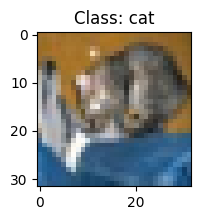

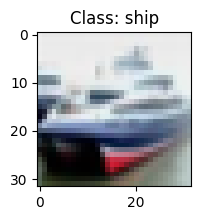

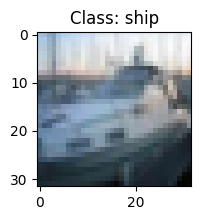

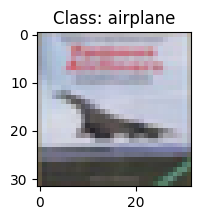

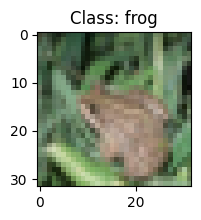

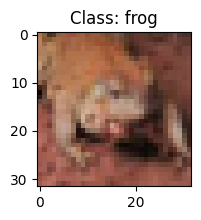

In [18]:
def plot_sample(X, y, index):
    plt.figure(figsize=(5,2)) # Create figure with specified size
    plt.imshow(X[index]) # Display image
    plt.title(f"Class: {classes[y[index][0]]}") # Set title with class name

# Display first sample from training set
for i in range(0, 6):
    plot_sample(X_test, y_test, i)


In [19]:
# Create Sequential ANN model (simple feedforward network)
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),  # Flatten 32x32x3 images to 3072−dimensional vectors
    layers.Dense(3000, activation='relu'),  # First dense layer with 3000 neurons and ReLU activation
    layers.Dense(1000, activation='relu'),  # Second dense layer with 1000 neurons
    layers.Dense(10, activation='sigmoid')  # Sigmoid converts outputs to probabilities (0−1 range)
])

# Compile the model with:
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model for 5 epochs (full passes through the dataset)
history = ann.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate ANN performance
ann_test_acc = ann.evaluate(X_test, y_test, verbose=2)
print(f"\nANN Test Accuracy: {ann_test_acc*100:.1f}%")

# Generate classification report
y_pred_ann = ann.predict(X_test)
y_pred_classes_ann = np.argmax(y_pred_ann, axis=1)
print("\nANN Classification Report:")
print(classification_report(y_test, y_pred_classes_ann, target_names=classes))

/home/ridoy/Documents/ML/ML Lab/ML LAB Exam/myenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


2025-08-21 11:01:25.838311: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 614400000 exceeds 10% of free system memory.


   8/1563 ━━━━━━━━━━━━━━━━━━━━ 1:51 72ms/step - accuracy: 0.1201 - loss: 2.3398

KeyboardInterrupt: 

In [ ]:
# Create Sequential CNN model
cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
history = cnn.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate CNN performance
cnn_test_acc = cnn.evaluate(X_test, y_test, verbose=2)
print(f"\nCNN Test Accuracy: {cnn_test_acc*100:.1f}%")

# Generate classification report
y_pred_cnn = cnn.predict(X_test)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)
print("\nCNN Classification Report:")
print(classification_report(y_test, y_pred_classes_cnn, target_names=classes))

/home/ridoy/Documents/ML/ML Lab/ML LAB Exam/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.5049 - loss: 1.3791 - val_accuracy: 0.6063 - val_loss: 1.1164
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.6435 - loss: 1.0174 - val_accuracy: 0.6568 - val_loss: 0.9880
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.7097 - loss: 0.8339 - val_accuracy: 0.6909 - val_loss: 0.8897
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7681 - loss: 0.6759 - val_accuracy: 0.6975 - val_loss: 0.8945
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.8145 - loss: 0.5333 - val_accuracy: 0.6982 - val_loss: 0.9184
313/313 - 2s - 6ms/step - accuracy: 0.6982 - loss: 0.9184

CNN Test Accuracy: 69.8%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

CNN Classification Report:
              precision    recall  f1-score   support

    airplane       0.75      0.71      0.73      1000
  automobile       0.78      0.85      0.82      1000
        bird       0.59      